# This workbook contains the models trained using data without 'default column'

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\akshayd6\Desktop\MyModels\Loan Default Prediction Capstone\Dataset without default.csv",index_col = 'Customer_id')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df.tail()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,marital__single,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Mishawaka,Mission 

In [6]:
df.shape

(37084, 606)

In [7]:
df.target.value_counts(normalize = True)

0    0.886528
1    0.113472
Name: target, dtype: float64

>We are going to train the model by using scaled and unscalled data and compare difference in accuracy.

### Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
num_columns = ['age','employee_variation_rate','consumer_price_index','consumer_confidence_index','euribor',
              'number_employed','duration']
cat_columns = ['job','marital','education','default','housing','contact','Campaign_month',
          'day_of_week','campaign','previous','City_Name']

In [10]:
tb_scaled = df[num_columns]

In [11]:
tb_scaled.head()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration
Customer_id,,,,,,,
1,56,1.1,93.994,-36.4,4.857,5191.0,307
2,45,1.1,93.994,-36.4,4.857,5191.0,198
3,59,1.1,93.994,-36.4,4.857,5191.0,139
4,41,1.1,93.994,-36.4,4.857,5191.0,217
5,24,1.1,93.994,-36.4,4.857,5191.0,380


In [12]:
scaler = StandardScaler()
scaler.fit(tb_scaled)
scaled = scaler.transform(tb_scaled)

In [13]:
scaled_num_columns = pd.DataFrame(scaled)
scaled_num_columns = scaled_num_columns.set_index(df.index)

In [14]:
scaled_num_columns.head()

,0,1,2,3,4,5,6
Customer_id,,,,,,,
1,1.586388,0.648404,0.722446,0.888187,0.712439,0.331618,0.404735
2,0.499122,0.648404,0.722446,0.888187,0.712439,0.331618,-0.208708
3,1.882915,0.648404,0.722446,0.888187,0.712439,0.331618,-0.540755
4,0.103752,0.648404,0.722446,0.888187,0.712439,0.331618,-0.101778
5,-1.576569,0.648404,0.722446,0.888187,0.712439,0.331618,0.815573


In [15]:
unscaled = df.copy()
unscaled.drop(columns = num_columns,inplace = True)

In [16]:
unscaled.head()

,job,education,marital__married,marital__single,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Mishawaka,Mission Viejo,Missoula,Missouri City,Mobile,Modesto,Monroe,Montebello,Montgomery,Moorhead,Moreno Valley,Morgan Hill,

In [17]:
scaled_data = pd.concat([scaled_num_columns,unscaled],axis = 1)

In [18]:
scaled_data.rename(columns = {0:'age',1:'employee_variation_rate',2:'consumer_price_index',
                             3:'consumer_confidence_index',4:'euribor',5:'number_employed',6:'duration'},inplace = True)

In [19]:
scaled_data.tail()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,marital__single,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,Campaign_month__jun,Campaign_month__mar,Campaign_month__may,Campaign_month__nov,Campaign_month__oct,Campaign_month__sep,day_of_week__mon,day_of_week__thu,day_of_week__tue,day_of_week__wed,campaign__2,campaign__3,campaign__4,campaign__5,campaign__6,campaign__7,campaign__8,campaign__9,campaign__10,campaign__11,campaign__12,campaign__13,campaign__14,campaign__15,campaign__16,campaign__17,campaign__18,campaign__19,campaign__20,campaign__21,campaign__22,campaign__23,campaign__24,campaign__25,campaign__26,campaign__27,campaign__28,campaign__29,campaign__30,campaign__31,campaign__32,campaign__33,campaign__34,campaign__35,campaign__37,campaign__39,campaign__40,campaign__41,campaign__42,campaign__43,campaign__56,previous__1,previous__2,previous__3,previous__4,previous__5,previous__6,previous__7,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,Andover,Ann Arbor,Antioch,Apopka,Apple Valley,Appleton,Arlington,Arlington Heights,Arvada,Asheville,Athens,Atlanta,Atlantic City,Auburn,Aurora,Austin,Avondale,Bakersfield,Baltimore,Bangor,Bartlett,Bayonne,Baytown,Beaumont,Bedford,Belleville,Bellevue,Bellingham,Bethlehem,Beverly,Billings,Bloomington,Boca Raton,Boise,Bolingbrook,Bossier City,Bowling Green,Boynton Beach,Bozeman,Brentwood,Bridgeton,Bristol,Broken Arrow,Broomfield,Brownsville,Bryan,Buffalo,Buffalo Grove,Bullhead City,Burbank,Burlington,Caldwell,Camarillo,Cambridge,Canton,Carlsbad,Carol Stream,Carrollton,Cary,Cedar Hill,Cedar Rapids,Champaign,Chandler,Chapel Hill,Charlotte,Charlottesville,Chattanooga,Chesapeake,Chester,Cheyenne,Chicago,Chico,Chula Vista,Cincinnati,Citrus Heights,Clarksville,Cleveland,Clifton,Clinton,Clovis,Coachella,College Station,Colorado Springs,Columbia,Columbus,Commerce City,Concord,Conroe,Conway,Coon Rapids,Coppell,Coral Gables,Coral Springs,Corpus Christi,Costa Mesa,Cottage Grove,Covington,Cranston,Cuyahoga Falls,Dallas,Danbury,Danville,Davis,Daytona Beach,Dearborn,Dearborn Heights,Decatur,Deer Park,Delray Beach,Deltona,Denver,Des Moines,Des Plaines,Detroit,Dover,Draper,Dublin,Dubuque,Durham,Eagan,East Orange,East Point,Eau Claire,Edinburg,Edmond,Edmonds,El Cajon,El Paso,Elkhart,Elmhurst,Elyria,Encinitas,Englewood,Escondido,Eugene,Evanston,Everett,Fairfield,Fargo,Farmington,Fayetteville,Florence,Fort Collins,Fort Lauderdale,Fort Worth,Frankfort,Franklin,Freeport,Fremont,Fresno,Frisco,Gaithersburg,Garden City,Garland,Gastonia,Georgetown,Gilbert,Gladstone,Glendale,Glenview,Goldsboro,Grand Island,Grand Prairie,Grand Rapids,Grapevine,Great Falls,Greeley,Green Bay,Greensboro,Greenville,Greenwood,Gresham,Grove City,Gulfport,Hackensack,Hagerstown,Haltom City,Hamilton,Hampton,Harlingen,Harrisonburg,Hattiesburg,Helena,Hempstead,Henderson,Hendersonville,Hesperia,Hialeah,Hickory,Highland Park,Hillsboro,Holland,Hollywood,Holyoke,Homestead,Hoover,Hot Springs,Houston,Huntington Beach,Huntsville,Independence,Indianapolis,Inglewood,Iowa City,Irving,Jackson,Jacksonville,Jamestown,Jefferson City,Johnson City,Jonesboro,Jupiter,Keller,Kenner,Kenosha,Kent,Kirkwood,Kissimmee,Knoxville,La Crosse,La Mesa,La Porte,La Quinta,Lafayette,Laguna Niguel,Lake Charles,Lake Elsinore,Lake Forest,Lakeland,Lakeville,Lakewood,Lancaster,Lansing,Laredo,Las Cruces,Las Vegas,Laurel,Lawrence,Lawton,Layton,League City,Lebanon,Lehi,Leominster,Lewiston,Lincoln Park,Linden,Lindenhurst,Little Rock,Littleton,Lodi,Logan,Long Beach,Longmont,Longview,Lorain,Los Angeles,Louisville,Loveland,Lowell,Lubbock,Macon,Madison,Malden,Manchester,Manhattan,Mansfield,Manteca,Maple Grove,Margate,Marietta,Marion,Marlborough,Marysville,Mason,Mcallen,Medford,Medina,Melbourne,Memphis,Mentor,Meriden,Meridian,Mesa,Mesquite,Miami,Middletown,Midland,Milford,Milwaukee,Minneapolis,Miramar,Mishawaka,Mission 

### Test Train split - Unscaled data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns = ['target'],axis = 1)
y = df['target']

In [22]:
print("X-shape:",X.shape)
print("y-shape:",y.shape)

X-shape: (37084, 605)
y-shape: (37084,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 42)

In [24]:
print(y_train.value_counts())
print(y_train.value_counts(normalize = True))

0    24599
1     3214
Name: target, dtype: int64
0    0.884443
1    0.115557
Name: target, dtype: float64


>Here we can see that the target variable is imbalaced ~88% - no and ~12% - yes. So we must make this a balanced sample by using SMOTE.

### Test Train split - Scaled data

In [25]:
X1 = scaled_data.drop(columns = ['target'],axis = 1)
y1 = scaled_data['target']

In [26]:
print("X-shape:",X1.shape)
print("y-shape:",y1.shape)

X-shape: (37084, 605)
y-shape: (37084,)


In [27]:
sX_train, sX_test, sy_train, sy_test = train_test_split(X1, y1, test_size=0.25,random_state = 42)

In [28]:
print(sy_train.value_counts())
print(sy_train.value_counts(normalize = True))

0    24599
1     3214
Name: target, dtype: int64
0    0.884443
1    0.115557
Name: target, dtype: float64


>Here we can see that the target variable is imbalaced ~88% - no and ~12% - yes. So we must make this a balanced sample by using SMOTE.

### SMOTE for unscaled data

In [29]:
from imblearn.over_sampling import SMOTE 

In [30]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [31]:
print("X-shape:",X_res.shape)
print("y-shape:",y_res.shape)

X-shape: (49198, 605)
y-shape: (49198,)


In [32]:
print(y_res.value_counts())
print(y_res.value_counts(normalize = True))

0    24599
1    24599
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


>Here the data was oversampled and now the ratio of yes:no is 1:1

### SMOTE for scaled data

In [33]:
sm1 = SMOTE(random_state=42)
sX_res, sy_res = sm1.fit_resample(sX_train, sy_train)

In [34]:
print("X-shape:",sX_res.shape)
print("y-shape:",sy_res.shape)

X-shape: (49198, 605)
y-shape: (49198,)


In [35]:
print(y_res.value_counts())
print(y_res.value_counts(normalize = True))

0    24599
1    24599
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


>Here the data was oversampled and now the ratio of yes:no is 1:1

### Logistic Regression

In [36]:
y_res.value_counts()

0    24599
1    24599
Name: target, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr.fit(X_res,y_res)

C:\Users\akshayd6\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr.score(X_test,y_test)

0.8235357566605545

### Logistic Regression using scaled data

In [40]:
lr1 = LogisticRegression()
lr1.fit(sX_res,sy_res)

C:\Users\akshayd6\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
lr.score(sX_test,sy_test)

0.8746629274080466

>Scaled data gives more accuracy when compared to unscalled data.

### Confusion martrix

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Unscaled LR model

In [43]:
lr_preds = lr.predict(X_test)

In [140]:
lr_preds.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [44]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8277
           1       0.37      0.89      0.52       994

    accuracy                           0.82      9271
   macro avg       0.68      0.85      0.71      9271
weighted avg       0.92      0.82      0.85      9271



In [96]:
X_test.shape

(9271, 605)

In [95]:
cm = confusion_matrix(y_test,lr_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),6746,1531
True(1),105,889


### Scaled LR model

In [46]:
lr1_preds = lr1.predict(sX_test)

In [47]:
print(classification_report(sy_test, lr1_preds))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      8277
           1       0.44      0.63      0.52       994

    accuracy                           0.88      9271
   macro avg       0.70      0.77      0.73      9271
weighted avg       0.90      0.88      0.88      9271



In [97]:
cm = confusion_matrix(sy_test,lr1_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),7490,787
True(1),365,629


### ROC_AUC - Unscaled LR model

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

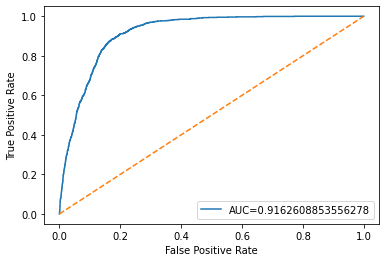

In [93]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

### ROC_AUC - Scaled LR model

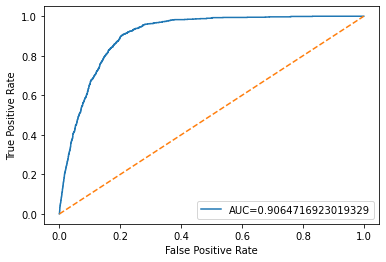

In [92]:
sy_pred_proba = lr1.predict_proba(sX_test)[:,1]
fpr1, tpr1, _ = roc_curve(sy_test,  sy_pred_proba)
auc1 = roc_auc_score(sy_test, sy_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier()

#### Unscaled data

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
rf.score(X_test,y_test)

0.913925142918779

In [103]:
rf_preds = rf.predict(X_test)

In [104]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8277
           1       0.66      0.41      0.51       994

    accuracy                           0.91      9271
   macro avg       0.79      0.69      0.73      9271
weighted avg       0.90      0.91      0.91      9271



### Confusion Matrix

In [105]:
cm = confusion_matrix(y_test,rf_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),8063,214
True(1),584,410


### ROC Curve

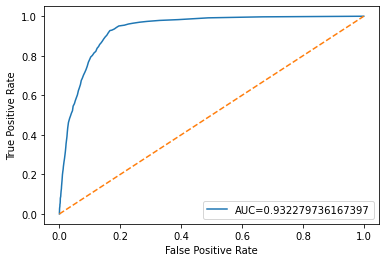

In [107]:
y_pred_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

### KNN Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier()

In [110]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [111]:
knn.score(X_test,y_test)

0.9013051450760435

In [112]:
knn_preds = knn.predict(X_test)

In [134]:
knn_report = classification_report(y_test, knn_preds,output_dict = True)

In [136]:
knn_df = pd.DataFrame(knn_report).transpose()

In [137]:
knn_df

,precision,recall,f1-score,support
0,0.938006,0.952398,0.945147,8277.000000
1,0.545559,0.475855,0.508329,994.000000
accuracy,0.901305,0.901305,0.901305,0.901305
macro avg,0.741783,0.714127,0.726738,9271.000000
weighted avg,0.895929,0.901305,0.898313,9271.000000


### Confusion Matrix

In [114]:
cm = confusion_matrix(y_test,knn_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),7883,394
True(1),521,473


ROC Curve

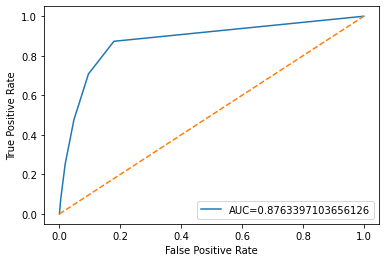

In [115]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

In [128]:
rf1 = RandomForestClassifier()

In [129]:
rf1.fit(sX_train,sy_train)

RandomForestClassifier()

In [131]:
rf1.score(sX_test,sy_test)

0.9105813828066013

In [132]:
rf1_preds = rf1.predict(sX_test)

In [133]:
print(classification_report(y_test, rf1_preds))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8277
           1       0.63      0.40      0.49       994

    accuracy                           0.91      9271
   macro avg       0.78      0.69      0.72      9271
weighted avg       0.90      0.91      0.90      9271



### Conclusion and Model selection